# Problema

GoNuts produce diversi succhi realizzati interamente con varie noci esotiche. Il loro mercato principale è la Cina. 
Gestiscono tre stabilimenti, situati in Etiopia, Tanzania e Nigeria. 
Si vuole determinare dove produrre i due più recenti succhi che offrono, Gingko Nut e Kola Nut, considerando che ogni impianto ha una diversa capacità di produzione dei diversi succhi. 
Il costo fisso si applica solo se la fabbrica produce succo. 
Inoltre, ogni succo ha una domanda prevista. 
Quanto di ogni succo dovrebbe essere prodotto in ogni impianto per ridurre al minimo il costo totale, soddisfacendo la domanda e rispettando la capacità dell'impianto?


|Costo/Unità |Ginko|Kola|             Capacità Mensile Impianto|
| --- | --- | --- | ---|
|Ethiopia|21.00 dol| 22.50 dol| &emsp;&emsp;&emsp;&emsp;&emsp;   425|
|Tanzania|22.50 dol| 24.50 dol| &emsp;&emsp;&emsp;&emsp;&emsp;   400|
|Nigeria|23.00 dol | 25.50 dol|   &emsp;&emsp;&emsp;&emsp;&emsp; 750|



|Domanda|Unità/Mese
|---|---
|Ginko|&emsp;&emsp;550
|Kola|&emsp;&emsp;450





Inizializziamo le librerie

In [1]:
#using Pkg
#Pkg.add("JuMP")
#Pkg.add("GLPK")

using JuMP, GLPK;

Definiamo il modello

In [2]:
m = Model(with_optimizer(GLPK.Optimizer));

### Variabili utili 

Le variabili che verranno dichiarate nel modello sono riportate di seguito. 

Si usa una notazione matriciale per rendere il codice più snello.

* <b>x[1:3][1:2]</b>: la matrice incognita delle quantità dei succhi, così costruito:
     * <b>x[1][1]</b>: la quantità di Ginko prodotta in Ethiopia
     * <b>x[1][2]</b>: la quantità di Kola prodotta in Ethiopia
     * <b>x[2][1]</b>: la quantità di Ginko prodotta in Tanzania
     * <b>x[2][2]</b>: la quantità di Kola prodotta in Tanzania
     * <b>x[3][1]</b>: la quantità di Ginko prodotta in Nigeria
     * <b>x[3][2]</b>: la quantità di Kola prodotta in Nigeria

* <b>costo</b>: la matrice del costo/unità dei due succhi, rispettivamente Ginko e Kola, prodotti rispettivamente in Ethiopia, Tanzania e Nigeria;
* <b>capacità</b>: il vettore delle capacità dei tre impianti, rispettivamente Ethiopia, Tanzania e Nigeria;
* <b>domanda</b>: il vettore della domanda di mercato delle quantità dei due succhi in ordine, Ginko e Kola. 


Definiamo la variabile x[1:6].

Richiediamo che le quantità dei succhi prodotti in ogni impianto siano non nulle e numeri interi.

In [3]:
@variable(m, x[1:3 , 1:2] >= 0, Int);

Definiamo il vettore della capacità e della domanda e la matrice dei costi.

In [4]:
capacita = [425 400 750];

In [5]:
domanda = [550 450];

In [6]:
costo = [21 22.5; 22.5 24.5; 23 25.5];

Costruiamo la funzione obiettivo.

In [7]:
@objective(m, Min, sum(x .* costo))

21 x[1,1] + 22.5 x[2,1] + 23 x[3,1] + 22.5 x[1,2] + 24.5 x[2,2] + 25.5 x[3,2]

Dichiariamo i vincoli del problema:
- la quantità di Ginko e Kola prodotta, deve soddisfare la domanda;
- la quantità complessiva di succo prodotta non deve superare la capacità dei tre impianti.

In [8]:
@constraint(m, constraint1, sum(x, dims=2) .<= capacita')

3×1 Array{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.LessThan{Float64}},ScalarShape},2}:
 x[1,1] + x[1,2] ≤ 425.0
 x[2,1] + x[2,2] ≤ 400.0
 x[3,1] + x[3,2] ≤ 750.0

In [9]:
@constraint(m, constraint2, sum(x, dims=1) .>= domanda)

1×2 Array{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.GreaterThan{Float64}},ScalarShape},2}:
 x[1,1] + x[2,1] + x[3,1] ≥ 550.0  x[1,2] + x[2,2] + x[3,2] ≥ 450.0

Il problema espresso in termini matematici:
$$
\text{Minimize } 21 x_{G,E} + 22.5 x_{K,E} + 22.5 x_{G,T}+ 24.5 x_{K,T} + 23 x_{G,N} + 25.5 x_{K,N}  
\text{ s.t } \begin{cases}  x_{G,E} + x_{K,E} \leq 425 \\ x_{G,T} + x_{K,T} \leq 400 \\ x_{G,N} + x_{K,N} \leq 750 \\ x_{G,E} + x_{G,T} + x_{G,N} \geq 550 \\ x_{K,E} + x_{K,T} + x_{K,N} \geq 450 \\ 
x_{G,E}, x_{K,E}, x_{G,T}, x_{K,T}, x_{G,N}, x_{K,N} \geq 0 \end{cases}
$$

Avviamo l'algoritmo di ottimizzazione.

In [10]:
optimize!(m)

Verifichiamo che l'algoritmo abbia fornito risultato con esito positivo.

In [11]:
termination_status(m)

OPTIMAL::TerminationStatusCode = 1

<p style="border: 3px solid crimson;box-shadow: 5px 6px indianRed;padding:20px;">La soluzione ottimale</p>




In [13]:
println("x_{G,E} = ", value(x[1,1]))
println("x_{K,E} = ", value(x[1,2]))
println("x_{G,T} = ", value(x[2,1]))
println("x_{K,T} = ", value(x[2,2]))
println("x_{G,N} = ", value(x[3,1]))
println("x_{K,N} = ", value(x[3,2]))

println("I costi minimi a cui far fronte = ", 21.5 * value(x[1,1])+22.5* value(x[1,2])+22.5* value(x[2,1])+24.5* value(x[2,2])+23* value(x[3,1])+25.5* value(x[3,2]), " dollari")

x_{G,E} = 0.0
x_{K,E} = 425.0
x_{G,T} = 375.0
x_{K,T} = 25.0
x_{G,N} = 175.0
x_{K,N} = 0.0
I costi minimi a cui far fronte = 22637.5 dollari


Disegnamo un grafico a barre con le quantità dei succhi ottimali da produrre, al fine di minimizzare i costi.

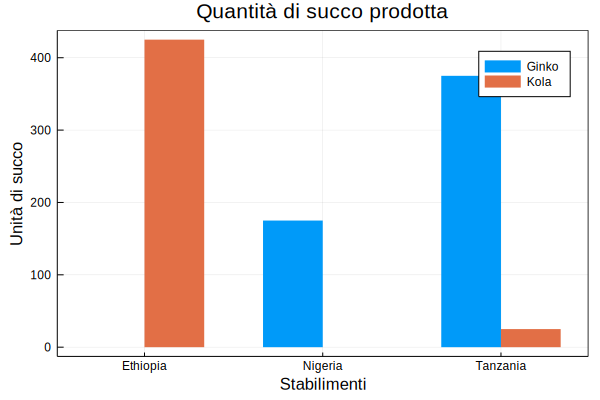

In [14]:
using StatsPlots

ctg = repeat(["Ginko", "Kola"], inner = 3)
nam = ["Ethiopia", "Tanzania", "Nigeria","Ethiopia", "Tanzania","Nigeria"]

groupedbar(nam, [ value(x[1,1]) value(x[1,2]) ; value(x[2,1]) value(x[2,2]) ; value(x[3,1]) value(x[3,2]) ], group = ctg, xlabel = "Stabilimenti", ylabel = "Unità di succo",
        title = "Quantità di succo prodotta", bar_width = 0.67,
        lw = 0, framestyle = :box)

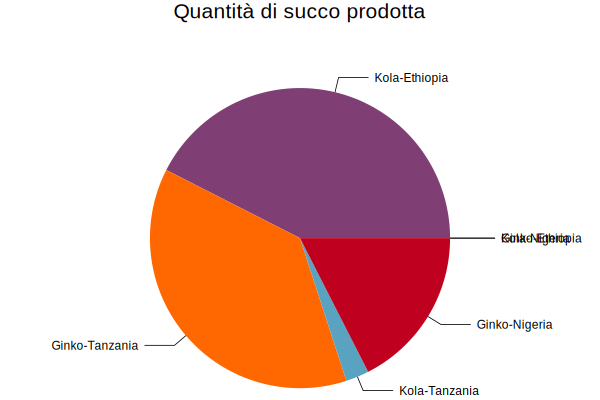

In [22]:
Plots.gr()

totale= sum([value(x[1,1]) value(x[1,2]) value(x[2,1]) value(x[2,2]) value(x[3,1]) value(x[3,2])])

etichette = ["Ginko-Ethiopia","Kola-Ethiopia","Ginko-Tanzania","Kola-Tanzania","Ginko-Nigeria","Kola-Nigeria"]
y = [value(x[1,1]) ; value(x[1,2]) ; value(x[2,1]) ; value(x[2,2]) ; value(x[3,1]) ; value(x[3,2])]./totale

pie(etichette, y, title="Quantità di succo prodotta", l=0.5)

In [23]:
y

6-element Array{Float64,1}:
 0.0
 0.425
 0.375
 0.025
 0.175
 0.0